<a href="https://colab.research.google.com/github/gyujin0450/Rstudy/blob/master/R13_%EC%B6%94%EC%A0%95%EA%B3%BC%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[이론자료](https://github.com/siestageek/python_statistics/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%ED%86%B5%EA%B3%8414_%EA%B0%80%EC%84%A4%EA%B3%BC%EA%B2%80%EC%A0%95.ipynb)

단일 표본 t-검정
- 모집단의 평균값과 검정 값을 비교할 때 사용
- 흔하게 사용되는 분석은 아님

예) 성인의 평균는 67.6(172cm)인지 알아보자!
- H0 : 성인의 평균키는 67.6 인지이다.
- H1 : 성인의 평균키는 67.6 인지아니다.
  *  검정 방법(1) : 방향성이 없으므로 양측검정 실시
  *  유의 수준(1) : 0.05 ( 양측 : 0.025 )

- H2 : 성인의 평균키는 67.6 인지 이상이다.
- H3 : 성인의 평균키는 67.6 인지 미만이다.
  * 건정 방법(2,3) : 방향성이 포함되므로 단측 검정 실시
  * 유의 수준(2,3) : 0.05 ( 단측 : 0.05 )

R에서 단일표본 t-검증을 알아보려면 t.test 함수 사용
- t.test(표본, mu = 평균, alterantive = 단측/양측 여부)


In [1]:
# 데이터 가져오기
h <- read.csv("https://raw.githubusercontent.com/siestageek/datasets/master/csv/coffee.csv")

In [2]:
head(h)

,user_id,age,drinks_coffee,height
,<int>,<chr>,<chr>,<dbl>
1,4509,<21,False,64.53818
2,1864,>=21,True,65.82425
3,2060,<21,False,71.31985
4,7875,>=21,True,68.56940
5,6254,<21,True,64.02023
6,3742,<21,False,63.49178


In [3]:
str(h)

'data.frame':	2974 obs. of  4 variables:
 $ user_id      : int  4509 1864 2060 7875 6254 3742 4996 5695 2619 2368 ...
 $ age          : chr  "<21" ">=21" "<21" ">=21" ...
 $ drinks_coffee: chr  "False" "True" "False" "True" ...
 $ height       : num  64.5 65.8 71.3 68.6 64 ...


In [4]:
summary(h$height)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  56.22   65.27   67.95   67.60   69.79   76.19 

In [6]:
# t 검점1 : 양측 검정
t.test(h$height, mu = 67.6, alternative = c('two.sided'))


	One Sample t-test

data:  h$height
t = -0.043933, df = 2973, p-value = 0.965
alternative hypothesis: true mean is not equal to 67.6
95 percent confidence interval:
 67.48533 67.70964
sample estimates:
mean of x 
 67.59749 


(양측검증) p-value > 0.025 이므로 h0 채택, 즉 평균키 67.6 이다!!

In [7]:
# t 검점2 : 단측 검정, 오른쪽 꼬리(이상)
t.test(h$height, mu = 67.6, alternative = c('greater'))


	One Sample t-test

data:  h$height
t = -0.043933, df = 2973, p-value = 0.5175
alternative hypothesis: true mean is greater than 67.6
95 percent confidence interval:
 67.50337      Inf
sample estimates:
mean of x 
 67.59749 


(단측검정) p-value > 0.05 이므로 h0 채택,즉 평균키는 67.6이다!!

In [8]:
# t 검점3 : 단측 검정, 왼쪽 꼬리(미만)
t.test(h$height, mu = 67.6, alternative = c('less'))


	One Sample t-test

data:  h$height
t = -0.043933, df = 2973, p-value = 0.4825
alternative hypothesis: true mean is less than 67.6
95 percent confidence interval:
    -Inf 67.6916
sample estimates:
mean of x 
 67.59749 


(단측검정) p-value > 0.05 이므로 h0 채택,즉 평균키는 67.6이다!!

ex) 학생들의 키가 평균 175cm 인지 가설검정

In [29]:
set.seed(2010311730) # 난수생성 고정
s <- sample(c(162:182),50, replace = T)

In [30]:
summary(s)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  162.0   167.0   172.5   172.5   178.8   182.0 

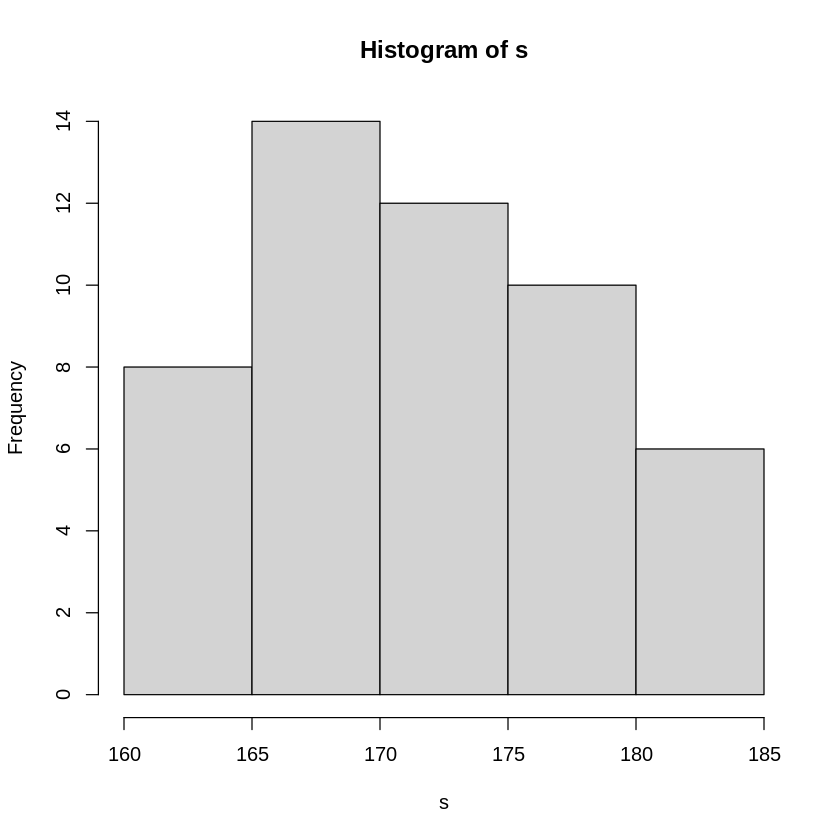

In [37]:
hist(s)

H0 : 학생들의 키평균은 175cm 이다.

In [36]:
t.test(s, nu = 175 , alternative = c("two.sided"))


	One Sample t-test

data:  s
t = 196.17, df = 49, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 170.7329 174.2671
sample estimates:
mean of x 
    172.5 


(양측) p < 0.025 이므로 H0 기각, 즉 학생평균키는 175cm 가 아니다

ex) 어떤 보험회사의 클레임 편균 처리 비용이 60달러일때 비용절감 정책을 도입한 효과를 알아보려고 함.
- 지난달 처리된 26건의 클레임을 표본으로 채택할 때
- 유의수준 0.01에서 처리비용이 평균 60미만인지 검정하시오

- H0 : 처리비용이 평균 60 이다.
- H1 : 처리비용이 평균 60 미만이다.

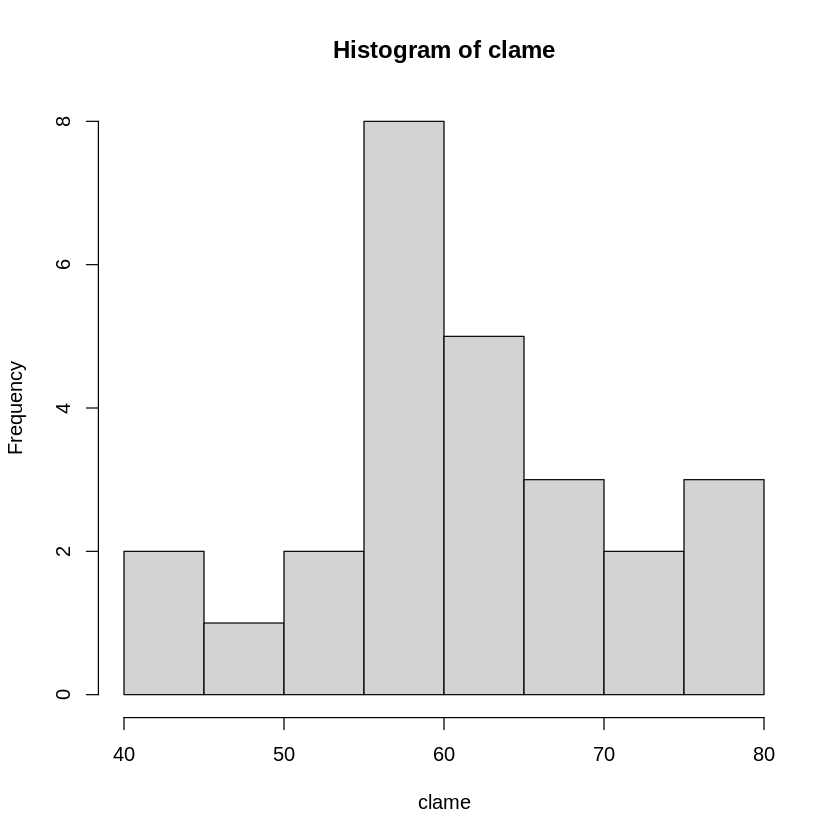

In [39]:
set.seed(2010311715) # 난수생성 고정
clame <- sample(c(38:78),26, replace = T)
hist(clame)

In [40]:
t.test(clame, mu = 60, alternative = c('less'))


	One Sample t-test

data:  clame
t = 0.82764, df = 25, p-value = 0.7921
alternative hypothesis: true mean is less than 60
95 percent confidence interval:
     -Inf 64.94931
sample estimates:
mean of x 
 61.61538 


(단측) p-value > 0.01 므로 h0 채택, 비용절감 효과는 없다. 

# 검증하기전에 정규성 검증을 해야 함!!!

정규성 검정
- 데이터의 분포가 정규분포를 따르는지 알아보는 것을 의미
- 통계의 다양한 검정법은 데이터의 정규분포를 가정하고 수행됨
- 데이터가 충분히 크다면(보통 30개 이상) 중심극한정리를 적용할 수 있음
- 하지만, 그 이하일 경우 별도의 정규성 검정이 필요할 수 있음
- 독립표본을 이용해서 가설검정을 실시하기 위해서는 반드시 정규성, 등분산성이 만족되어야 함

- 히스토그램 : 시각적 확인
- 분위수 그래프 : QQ도표
- shapiro-wilk 검정 : shapiro-test

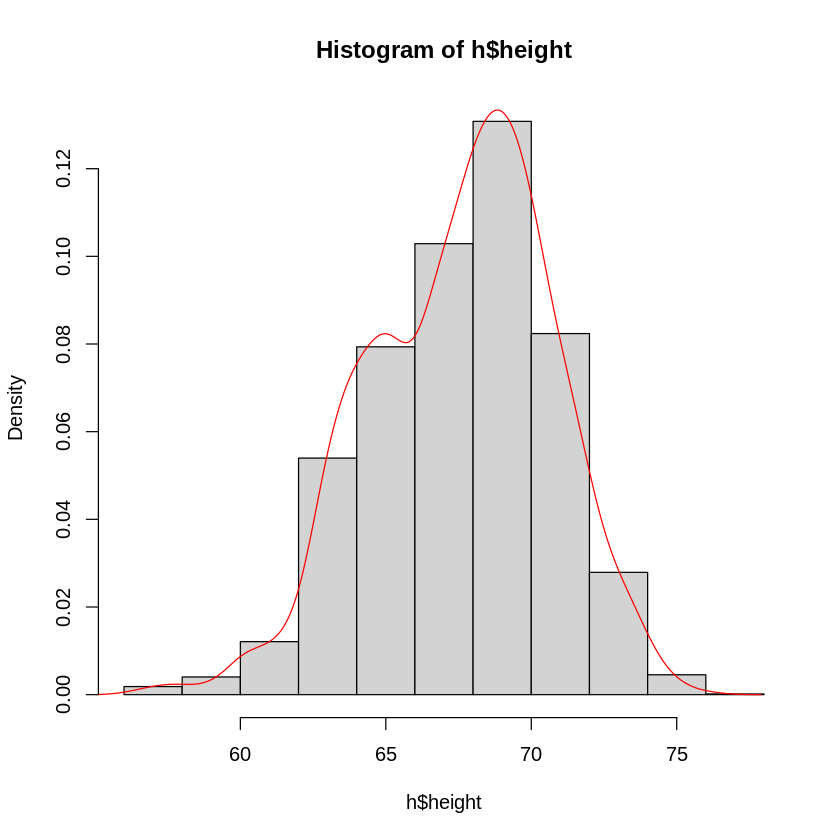

In [42]:
hist(h$height, probability = T)
lines(density(h$height), col = 'red')

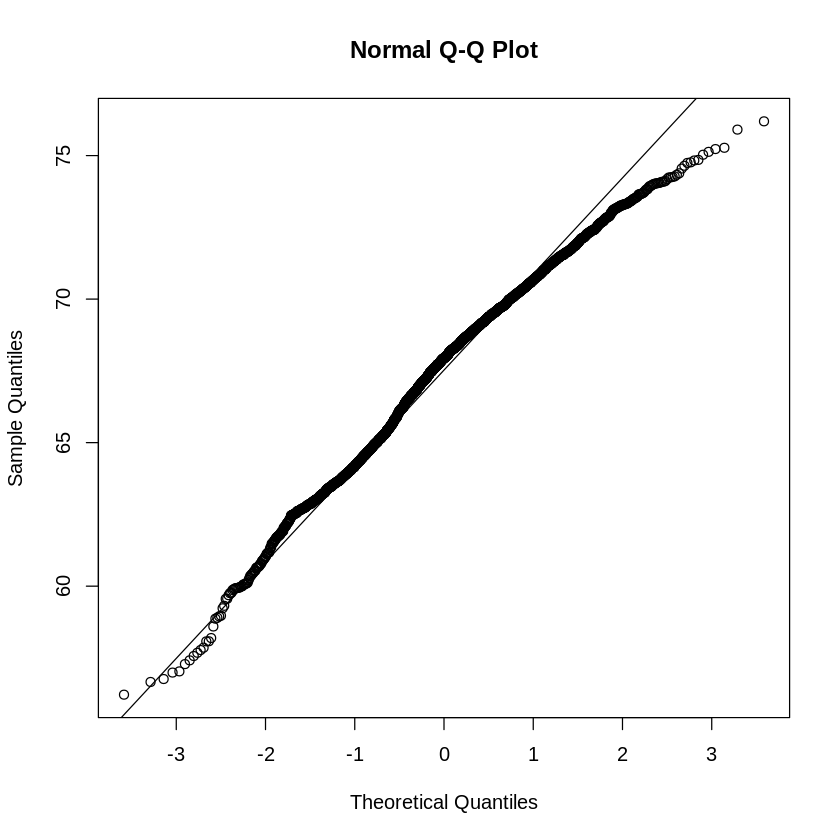

In [44]:
qqnorm(h$height)
qqline(h$height)

In [45]:
shapiro.test(h$height)


	Shapiro-Wilk normality test

data:  h$height
W = 0.99039, p-value = 2.861e-13


- h0 : 정규분포를 따른다.
- p < 0.05 이므로 h0 기각, 정규성이 없다

- 앞서 수행한 t-test는 유효하지 않음!!!

학생키(s)의 정규성 검토

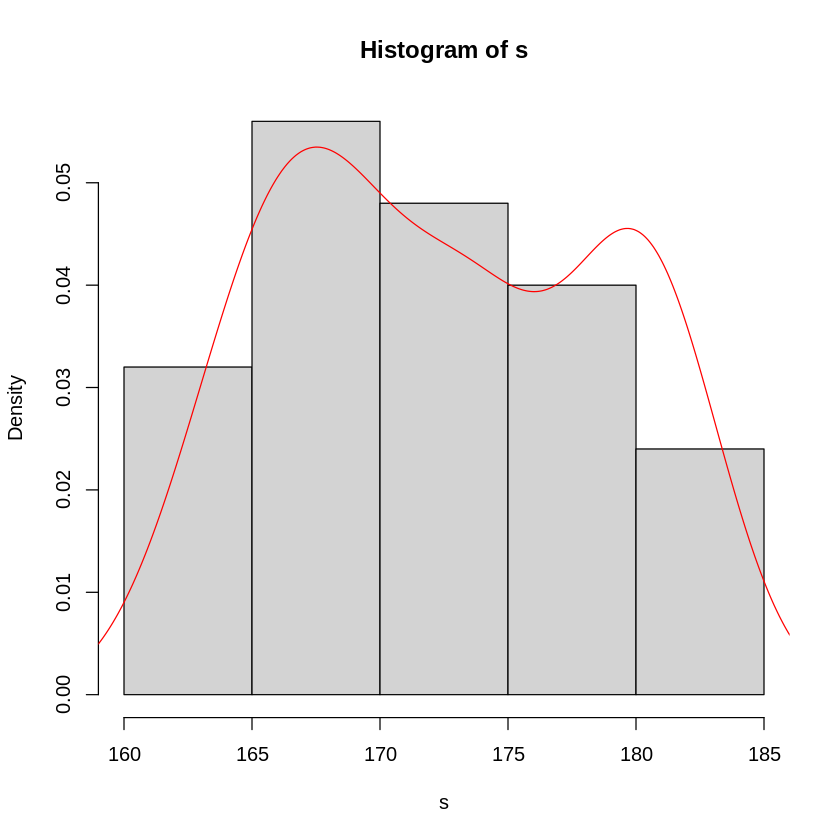

In [50]:
hist(s, probability = T)
lines(density(s), col = 'red')

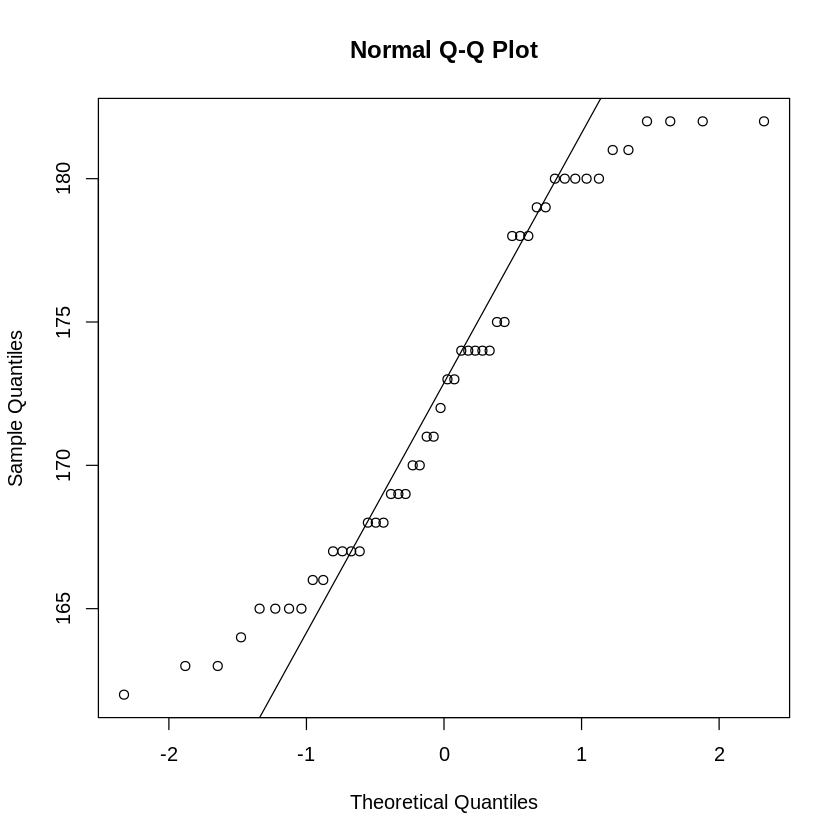

In [48]:
qqnorm(s)
qqline(s)

In [47]:
options(scipen = 100)
shapiro.test(s)


	Shapiro-Wilk normality test

data:  s
W = 0.9307, p-value = 0.005875


p-value < 0.05 므로 h0 기각, 정규성이 없음

클래임(clame) 의 정규성 확인

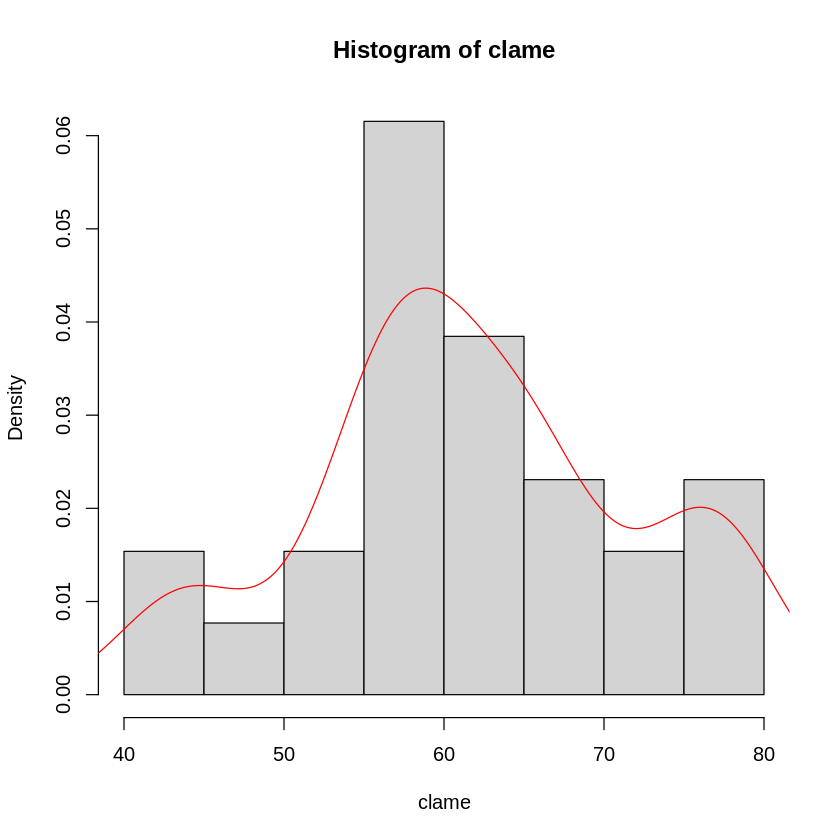

In [51]:
hist(clame, probability = T)
lines(density(clame), col = 'red')

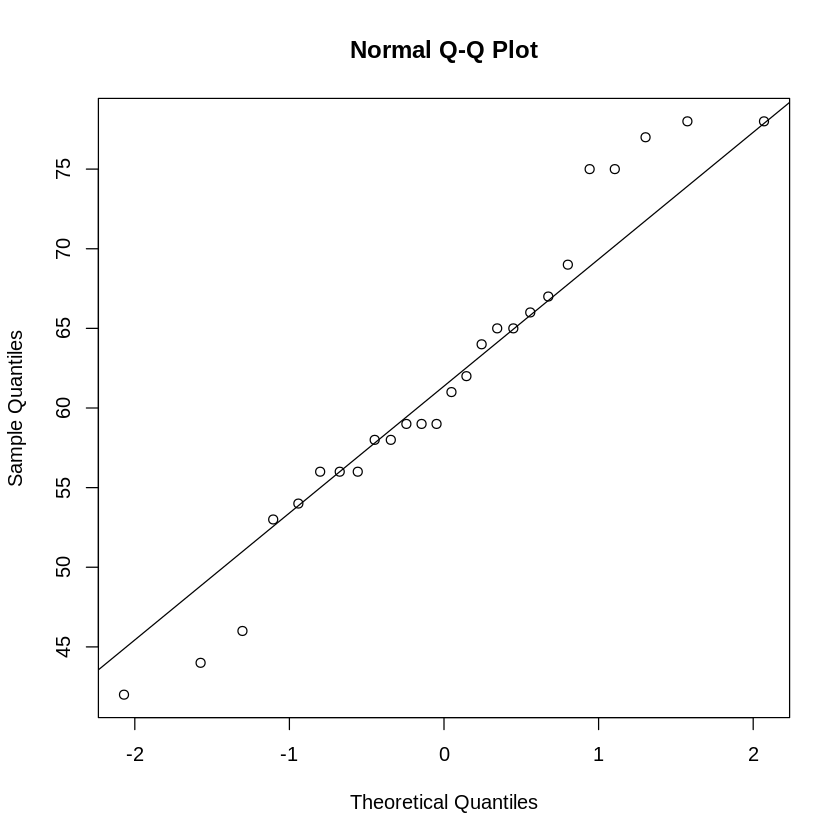

In [53]:
qqnorm(clame)
qqline(clame)

In [54]:
shapiro.test(clame)


	Shapiro-Wilk normality test

data:  clame
W = 0.95783, p-value = 0.3507


p-value > 0.05 므로 H0 채택, 정규성 있음

예) 클레임 데이터(clame.txt) 표본에 대해 유의 수준 0.01에서 처리비용이 평균 60 미만인지 검정, 정규성 검정

In [56]:
c2 <- read.csv("https://raw.githubusercontent.com/siestageek/datasets/master/txt/claim.txt")

In [62]:
summary(c2$claim)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  38.00   49.50   56.50   56.42   62.75   78.00 

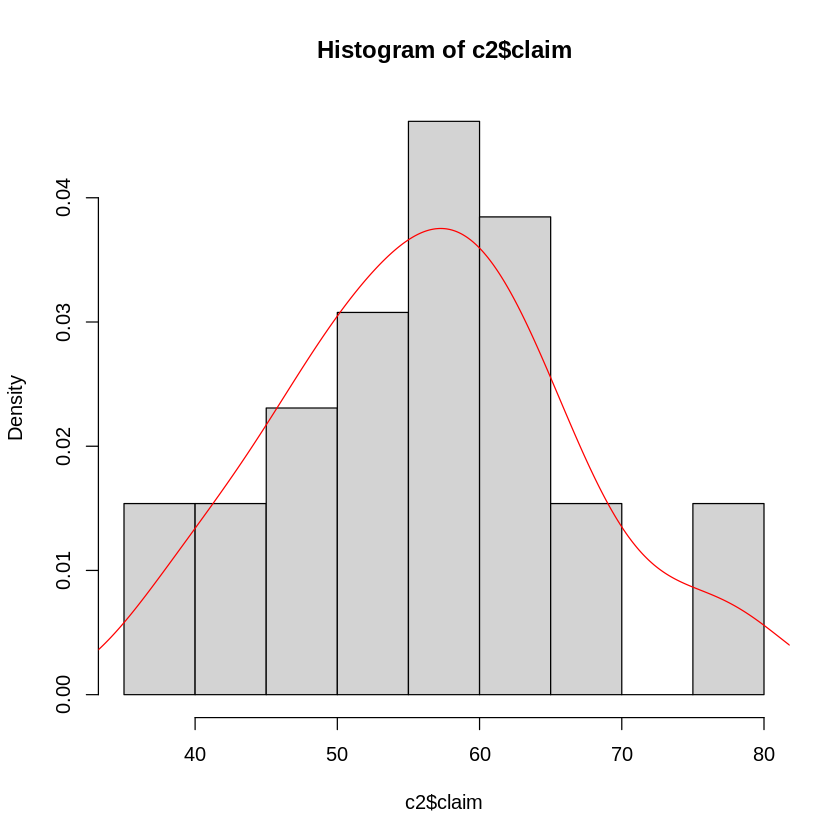

In [63]:
hist(c2$claim, probability = T)
lines(density(c2$claim), col = 'red')

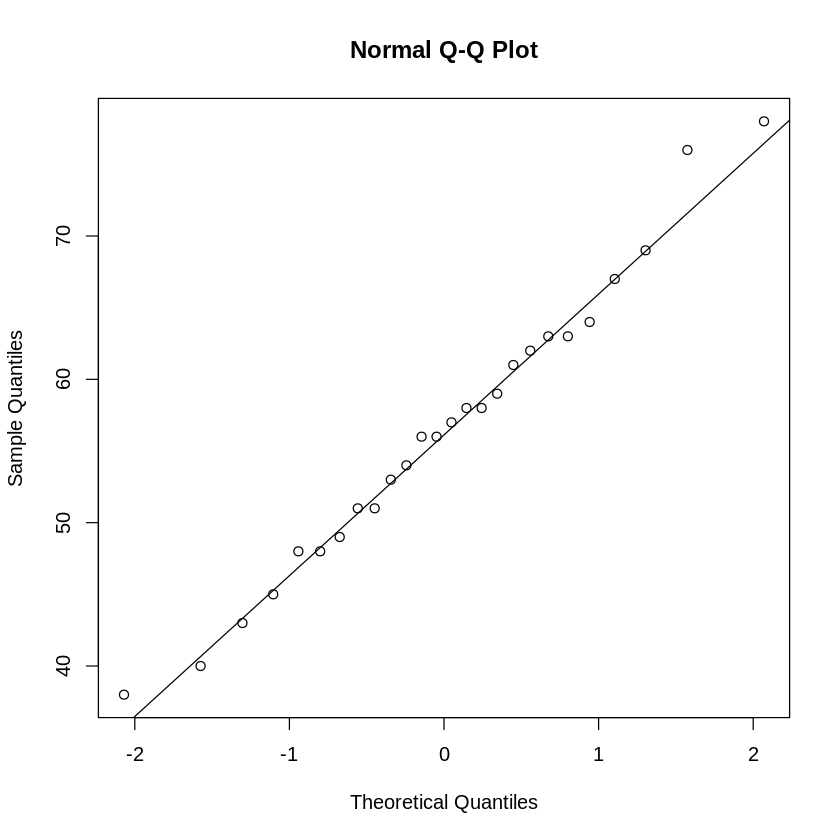

In [65]:
qqnorm(c2$claim)
qqline(c2$claim)

In [66]:
shapiro.test(c2$claim)


	Shapiro-Wilk normality test

data:  c2$claim
W = 0.98413, p-value = 0.9472


p-value > 0.01 므로 h0 채택, 정규성있음

In [67]:
t.test(clame, mu = 60, alternative = c('less'))


	One Sample t-test

data:  clame
t = 0.82764, df = 25, p-value = 0.7921
alternative hypothesis: true mean is less than 60
95 percent confidence interval:
     -Inf 64.94931
sample estimates:
mean of x 
 61.61538 


(단측) p-value > 0.01 므로 h0 채택, 비용절감 효과는 없다.
